# Lets Grow More 

# Name- AVANI AGRAWAL

# DATA  SCIENCE INTERN


# TASK 1 : Iris Flowers Classification ML Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris="https://raw.githubusercontent.com/kriti818/LetsGrowMore/main/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.read_csv(iris, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.species.unique()  # So we have 3 different species of iris flower.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
dataset.shape # Gives the number of rows and columns of dataset.

(150, 5)

In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [7]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### This clearly indicated that we dont have any null values in our dataset.

## Data Visualization 

<AxesSubplot:>

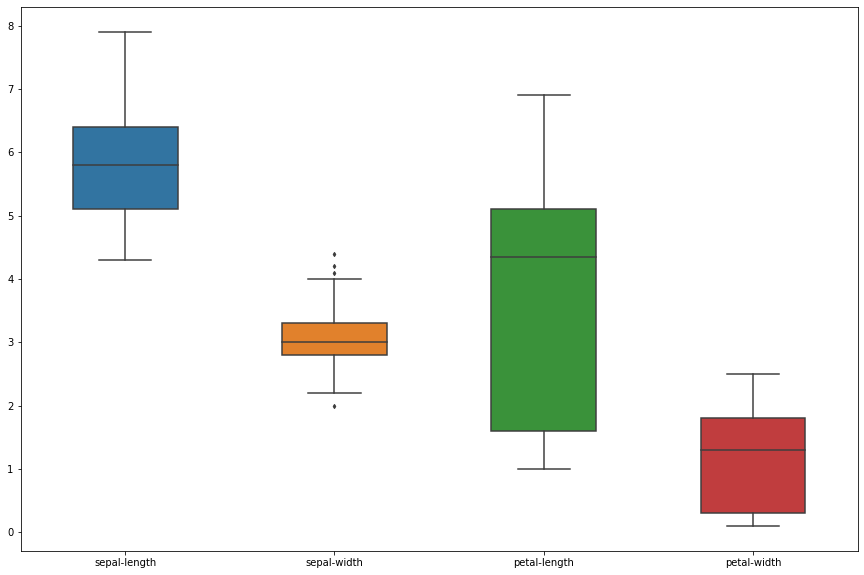

In [8]:
#Boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dataset, width= 0.5, ax=ax, fliersize=3)

### so we can see that sepal-width has some outliers.

<AxesSubplot:xlabel='species', ylabel='petal-width'>

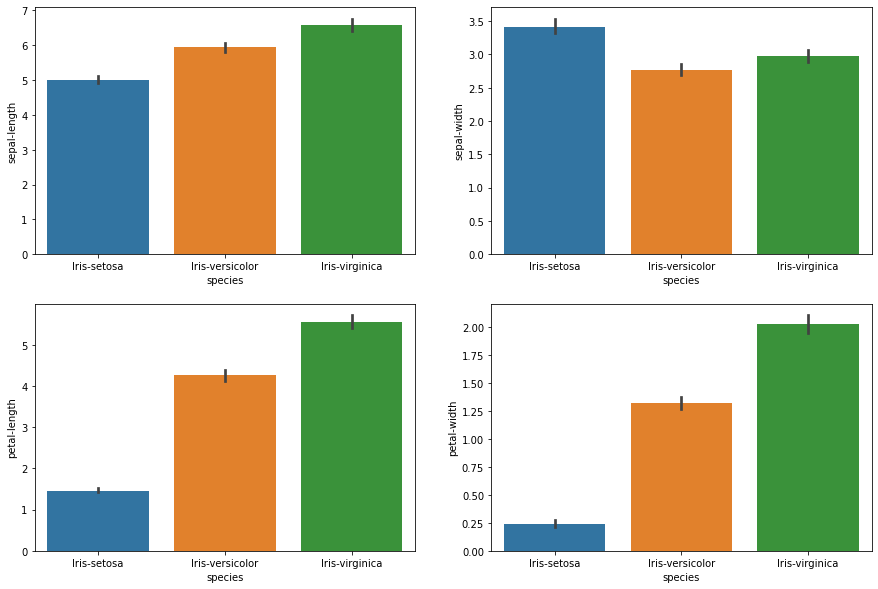

In [9]:
#Barplot 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'species', y = 'sepal-length', data=dataset)
plt.subplot(2,2,2)
sns.barplot(x = 'species', y = 'sepal-width', data=dataset)
plt.subplot(2,2,3)
sns.barplot(x = 'species', y = 'petal-length', data=dataset)
plt.subplot(2,2,4)
sns.barplot(x = 'species', y = 'petal-width', data=dataset)


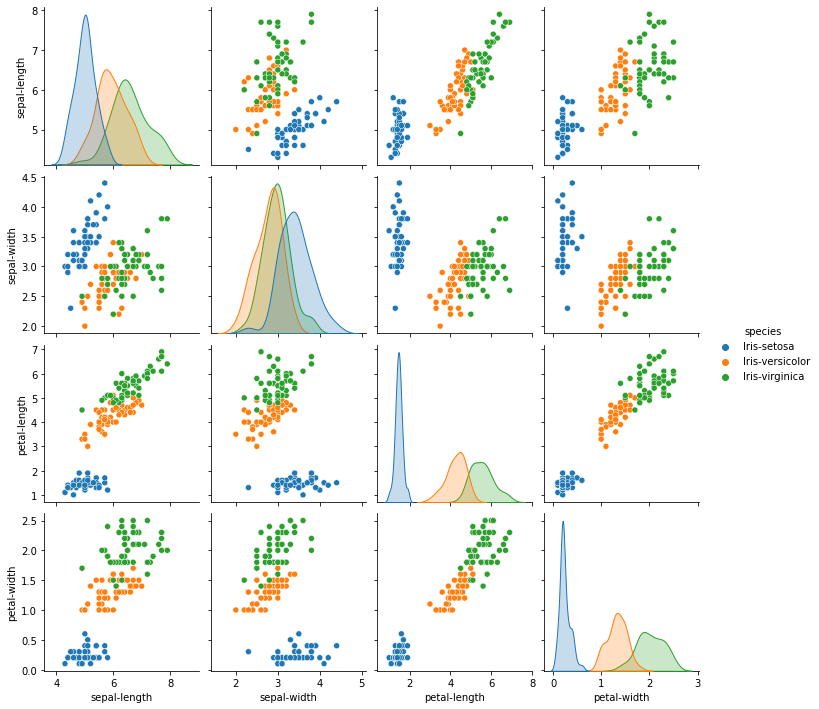

In [10]:
#Pairplot
sns.pairplot(dataset,hue='species')

### Here we can see that one class is linearly seperable from the other two.

# Correlation 

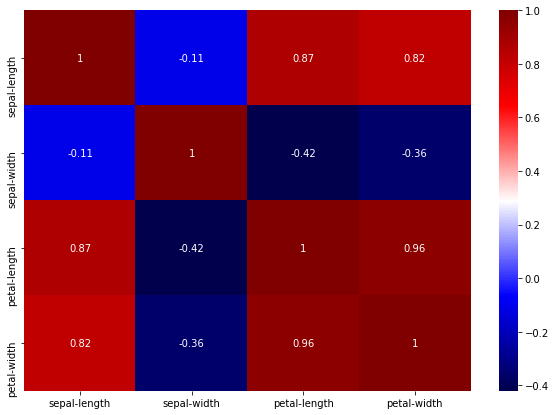

In [11]:
#Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True,cmap="seismic")
plt.show()

# Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # It is used to normalize labels.

In [13]:
dataset['species'] = le.fit_transform(dataset['species'])  #fit_transform: Fit label encoder and return encoded labels.
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X = dataset.drop(columns=['species']) 
y = dataset['species']
X[:5] # return list from beginning until index 5.

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Splitting the dataset into training and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Using Supervised machine learning model (Logistic Regression)

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [17]:
log_reg.score(X, y)  #checking accuracy on old dataset using score() function.

0.9733333333333334

In [18]:
log_reg.score(X_train, y_train) 

0.9642857142857143

In [19]:
log_reg.score(X_test, y_test)

1.0